<a href="https://colab.research.google.com/github/tani-h/Telecommunication-Network-Routing-System-Using-Minimum-Number-of-Channels/blob/main/Telecom_Routing_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install binpacking

  Preparing metadata (setup.py) ... done
  Created wheel for binpacking: filename=binpacking-1.5.2-py3-none-any.whl size=10093 sha256=25691eee29f07e495d37c520fa9201978daf214f295f8f9936a9e3a8800e3f13
  Stored in directory: /root/.cache/pip/wheels/69/69/bb/8cb3bba0d8870bbcbaf8a9f26b17d07ed5714dd3a6b0c73f3d
Successfully built binpacking


Input: 
[(1, 2), (2, 3), (2, 4), (3, 5), (4, 5)]


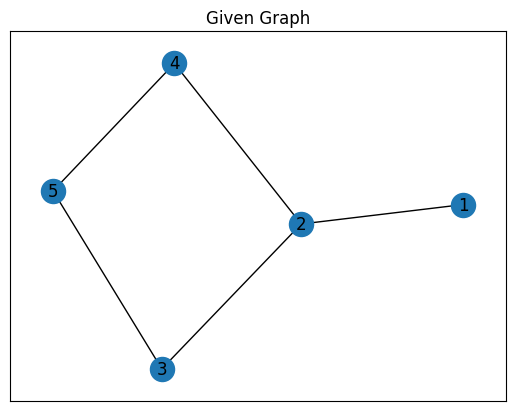

All source sinks:  [[1, 3], [1, 5], [3, 4]]
Bandwidth:  4
Cost of all demands:  [2, 2, 3]

************* Greedy Approach **************
List of Shortest Paths:  [[1, 2, 3], [1, 2, 3, 5], [3, 2, 4]]
List of Packet Costs for each Edge:  {(1, 2): [2, 2], (2, 3): [2, 2, 3], (3, 5): [2], (2, 4): [3]}
### Total  5  channels needed for path:  [[1, 2, 3], [1, 2, 3, 5], [3, 2, 4]]

************* Local Search Approach **************
List of all possible paths:  [[[1, 2, 3], [1, 2, 4, 5, 3]], [[1, 2, 3, 5], [1, 2, 4, 5]], [[3, 2, 4], [3, 5, 4]]]
Initial Random Path List:  [[1, 2, 4, 5, 3], [1, 2, 4, 5], [3, 5, 4]]
Initial Randomly selected State:  [1, 1, 1]
List of Packet Costs for each Edge:  {(1, 2): [2, 2], (2, 4): [2, 2], (4, 5): [2, 2, 3], (3, 5): [2, 3]}
### Total  6  channels needed for path:  [[1, 2, 4, 5, 3], [1, 2, 4, 5], [3, 5, 4]]
List of Packet Costs for each Edge:  {(1, 2): [2, 2], (2, 3): [2], (2, 4): [2], (4, 5): [2, 3], (3, 5): [3]}
### Total  6  channels needed for path:  [[1, 2

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
from itertools import combinations
from random import random
from itertools import repeat
import binpacking
import random as rnd
import numpy as np

# ********************************* Greedy Algorithm and Local Search Approach (Given Graph) *******************************

bandwidth = 4
# bandwidth = rnd.randint(4,10)

def ER(n, p):
    V = set([v for v in range(n)])
    E = set()
    for combination in combinations(V, 2):
        a = random()
        if a < p:
            E.add(combination)

    g = nx.Graph()
    g.add_nodes_from(V)
    g.add_edges_from(E)

    return g

def generate_all_source_sink_pairs(n):
    num_of_possible_paths = n*(n-1)/2
    num_of_demands = rnd.randint(1,num_of_possible_paths/3)
    print("Num of demands: ",num_of_demands)
    all_source_sink_pairs = [random_pairs(range(0, n)) for i in range(num_of_demands)]

    return all_source_sink_pairs

def get_shortest_path_lists_for_all_source_sink_pairs(all_source_sink_pairs):
    path_list = []

    for source_sink_pair in all_source_sink_pairs:
        path_list.append(list(nx.shortest_path(G, source_sink_pair[0], source_sink_pair[1])))

    return path_list

def get_cost_dictionary_for_each_edge(path_list, cost_list):
    edge_cost_dict = {}
    demand_number = 0

    for path in path_list:
        path_cost = cost_list[demand_number]
        path_edges = len(path) - 1

        demand_number += 1

        for i in range(len(path)-1):
            pair = sorted(path[i: i + 2])
            pair_as_key = tuple(pair)
            if pair_as_key in edge_cost_dict:
                edge_cost_dict[pair_as_key].append(path_cost)
            else:
                edge_cost_dict[pair_as_key] = [path_cost]

    return edge_cost_dict

def get_num_of_trans_channels_using_edge_cost_dict(edge_cost_dict):
    num_of_transmission_channels = 0

    for key, values in edge_cost_dict.items():
        num_of_packets = len(values)
        cost_of_packets = values
        num_of_current_edge_channels = 1

        if num_of_packets > 1:
            channels = binpacking.to_constant_volume(cost_of_packets,bandwidth)
            num_of_current_edge_channels = len(channels)

        num_of_transmission_channels += num_of_current_edge_channels

    return num_of_transmission_channels

def get_all_possible_path_lists_for_all_source_sink_pairs(all_source_sink_pairs):
    all_possible_path_lists = []

    for source_sink_pair in all_source_sink_pairs:
        all_possible_path_lists.append(list(nx.all_simple_paths(G, source_sink_pair[0], source_sink_pair[1])))

    return all_possible_path_lists

def get_num_of_trans_channels_for_path_list(path_list):
    num_of_transmission_channels = 0

    edge_cost_dict = get_cost_dictionary_for_each_edge(path_list, demand_cost_list)

    print("List of Packet Costs for each Edge: ", edge_cost_dict)
    num_of_transmission_channels = get_num_of_trans_channels_using_edge_cost_dict(edge_cost_dict)

    print("### Total ", num_of_transmission_channels, " channels needed for path: ", path_list)
    return num_of_transmission_channels

def select_path_indices_randomly(all_possible_path_lists):
    random_path_index_list = []

    for paths in all_possible_path_lists:
        num_of_paths = len(paths)
        selected_path_indx = rnd.randint(0, num_of_paths-1)
        random_path_index_list.append(selected_path_indx)

    return random_path_index_list

def get_paths_from_state(all_possible_path_lists, state):
    path_list = []
    demand_num = 0

    for paths in all_possible_path_lists:
        selected_path = paths[state[demand_num]]
        path_list.append(selected_path)
        demand_num += 1

    return path_list

def get_initial_state(all_possible_path_lists):
    initial_path_index_list = select_path_indices_randomly(all_possible_path_lists)
    initial_path_list = get_paths_from_state(all_possible_path_lists, initial_path_index_list)

    return initial_path_index_list, initial_path_list


def get_neighbour_state(all_possible_path_lists, cur_state):
    optimal_state = cur_state.copy()
    optimal_path_list = get_paths_from_state(all_possible_path_lists, optimal_state)
    optimal_objective = get_num_of_trans_channels_for_path_list(optimal_path_list)

    neighbour_state = optimal_state.copy()
    neighbour_path_list = optimal_path_list.copy()
    demand_num = 0

    for paths in all_possible_path_lists:
        state_path_indx = cur_state[demand_num]
        path_indx = 0

        for path in paths:
            if state_path_indx != path_indx:
                neighbour_state[demand_num] = path_indx
                neighbour_path_list = get_paths_from_state(all_possible_path_lists, neighbour_state)

                temp_objective = get_num_of_trans_channels_for_path_list(neighbour_path_list)
                if temp_objective <= optimal_objective:
                    optimal_objective = temp_objective
                    optimal_state = neighbour_state.copy()
                    optimal_path_list = get_paths_from_state(all_possible_path_lists, optimal_state)

                neighbour_state = cur_state.copy()

            path_indx += 1

        demand_num += 1
    return optimal_state

def hill_climbing_approcah(all_possible_path_lists, state):
    neighbour_state = state.copy()
    neighbour_path_list = get_paths_from_state(all_possible_path_lists, neighbour_state)
    iteration_bound = 50

    while True:
        if iteration_bound == 0:
            break

        iteration_bound -= 1

        state = neighbour_state.copy()
        cur_path_list = get_paths_from_state(all_possible_path_lists, state)

        neighbour_state = get_neighbour_state(all_possible_path_lists, neighbour_state)
        neighbour_path_list = get_paths_from_state(all_possible_path_lists, neighbour_state)

        if neighbour_state == state:
            break

        cur_objective = get_num_of_trans_channels_for_path_list(cur_path_list)
        neighbour_objective = get_num_of_trans_channels_for_path_list(neighbour_path_list)

        if cur_objective == neighbour_objective:
            neighbour_state = select_path_indices_randomly(all_possible_path_lists)
            neighbour_path_list = get_paths_from_state(all_possible_path_lists, neighbour_state)

    final_solution = get_num_of_trans_channels_for_path_list(neighbour_path_list)
    print("Iterations left: ", iteration_bound)

    return final_solution

def get_num_of_channels_using_greedy_approach(all_source_sink_pairs):
    num_of_transmission_channels = 0
    path_list = get_shortest_path_lists_for_all_source_sink_pairs(all_source_sink_pairs)
    print("List of Shortest Paths: ", path_list)

    num_of_transmission_channels = get_num_of_trans_channels_for_path_list(path_list)
    return num_of_transmission_channels

def get_num_of_channels_using_local_search(all_source_sink_pairs):
    num_of_transmission_channels = 0

    all_possible_path_lists = get_all_possible_path_lists_for_all_source_sink_pairs(all_source_sink_pairs)
    print("List of all possible paths: ", all_possible_path_lists)

    initial_state, initial_path_list = get_initial_state(all_possible_path_lists)
    print("Initial Random Path List: ", initial_path_list)
    print("Initial Randomly selected State: ", initial_state)

    num_of_transmission_channels = hill_climbing_approcah(all_possible_path_lists, initial_state)
    return num_of_transmission_channels



def generateGivenGraph():
    G = nx.Graph()
    G.add_edge(1,2)
    G.add_edge(2,3)
    G.add_edge(2,4)
    G.add_edge(3,5)
    G.add_edge(4,5)

    return G


def random_pairs(number_list):
    return list(np.random.choice(number_list, 2, replace=False))


print("Input: ")
n = 6
p = 0.7
# G = ER(n, p)
G = generateGivenGraph()
print(G.edges)
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos)
plt.title("Given Graph")
plt.show()

# all_source_sink_pairs = generate_all_source_sink_pairs(n)
all_source_sink_pairs = [[1,3],[1,5],[3,4]]
print("All source sinks: ", all_source_sink_pairs)

print("Bandwidth: ", bandwidth)

# demand_cost_list = list(np.random.randint(1, bandwidth+1, num_of_demands))
demand_cost_list = [2,2,3]
print("Cost of all demands: ", demand_cost_list)


print("\n************* Greedy Approach **************")
num_of_channels_greedy = get_num_of_channels_using_greedy_approach(all_source_sink_pairs)

print("\n************* Local Search Approach **************")
num_of_channels_local_search = get_num_of_channels_using_local_search(all_source_sink_pairs)

print("Results: ")
print("Minimum Number of Transmission Channels (Local Search) = ", num_of_channels_local_search)
print("Minimum Number of Transmission Channels (Greedy  Algo) = ", num_of_channels_greedy)



Input: 
[(0, 1), (0, 2), (0, 5), (1, 2), (1, 5), (1, 3), (2, 3), (2, 5), (4, 5)]


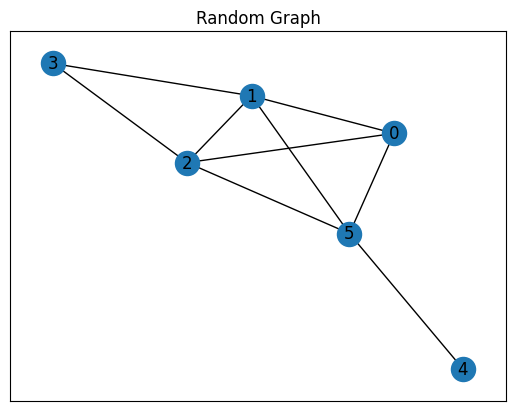

Num of demands:  4
All source sinks:  [[3, 4], [1, 3], [0, 2], [0, 5]]
Bandwidth:  7
Cost of all demands:  [1, 7, 3, 7]

************* Greedy Approach **************
List of Shortest Paths:  [[3, 1, 5, 4], [1, 3], [0, 2], [0, 5]]
List of Packet Costs for each Edge:  {(1, 3): [1, 7], (1, 5): [1], (4, 5): [1], (0, 2): [3], (0, 5): [7]}
### Total  6  channels needed for path:  [[3, 1, 5, 4], [1, 3], [0, 2], [0, 5]]

************* Local Search Approach **************
List of all possible paths:  [[[3, 2, 1, 0, 5, 4], [3, 2, 1, 5, 4], [3, 2, 0, 1, 5, 4], [3, 2, 0, 5, 4], [3, 2, 5, 4], [3, 1, 0, 2, 5, 4], [3, 1, 0, 5, 4], [3, 1, 2, 0, 5, 4], [3, 1, 2, 5, 4], [3, 1, 5, 4]], [[1, 0, 2, 3], [1, 0, 5, 2, 3], [1, 2, 3], [1, 5, 0, 2, 3], [1, 5, 2, 3], [1, 3]], [[0, 1, 2], [0, 1, 5, 2], [0, 1, 3, 2], [0, 2], [0, 5, 1, 2], [0, 5, 1, 3, 2], [0, 5, 2]], [[0, 1, 2, 5], [0, 1, 5], [0, 1, 3, 2, 5], [0, 2, 1, 5], [0, 2, 3, 1, 5], [0, 2, 5], [0, 5]]]
Initial Random Path List:  [[3, 1, 0, 5, 4], [1, 5, 2, 3

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
from itertools import combinations
from random import random
from itertools import repeat
import binpacking
import random as rnd
import numpy as np

# ********************************* Greedy Algorithm and Local Search Approach (Random Graph) *******************************

bandwidth = rnd.randint(4,10)

def ER(n, p):
    V = set([v for v in range(n)])
    E = set()
    for combination in combinations(V, 2):
        a = random()
        if a < p:
            E.add(combination)

    g = nx.Graph()
    g.add_nodes_from(V)
    g.add_edges_from(E)

    return g

def generate_all_source_sink_pairs(n):
    num_of_possible_paths = n*(n-1)/2
    num_of_demands = rnd.randint(1,num_of_possible_paths/3)
    print("Num of demands: ",num_of_demands)
    all_source_sink_pairs = [random_pairs(range(0, n)) for i in range(num_of_demands)]

    return all_source_sink_pairs, num_of_demands

def get_shortest_path_lists_for_all_source_sink_pairs(all_source_sink_pairs):
    path_list = []

    for source_sink_pair in all_source_sink_pairs:
        path_list.append(list(nx.shortest_path(G, source_sink_pair[0], source_sink_pair[1])))

    return path_list

def get_cost_dictionary_for_each_edge(path_list, cost_list):
    edge_cost_dict = {}
    demand_number = 0

    for path in path_list:
        path_cost = cost_list[demand_number]
        path_edges = len(path) - 1

        demand_number += 1

        for i in range(len(path)-1):
            pair = sorted(path[i: i + 2])
            pair_as_key = tuple(pair)
            if pair_as_key in edge_cost_dict:
                edge_cost_dict[pair_as_key].append(path_cost)
            else:
                edge_cost_dict[pair_as_key] = [path_cost]

    return edge_cost_dict

def get_num_of_trans_channels_using_edge_cost_dict(edge_cost_dict):
    num_of_transmission_channels = 0

    for key, values in edge_cost_dict.items():
        num_of_packets = len(values)
        cost_of_packets = values
        num_of_current_edge_channels = 1

        if num_of_packets > 1:
            channels = binpacking.to_constant_volume(cost_of_packets,bandwidth)
            num_of_current_edge_channels = len(channels)

        num_of_transmission_channels += num_of_current_edge_channels

    return num_of_transmission_channels

def get_all_possible_path_lists_for_all_source_sink_pairs(all_source_sink_pairs):
    all_possible_path_lists = []

    for source_sink_pair in all_source_sink_pairs:
        all_possible_path_lists.append(list(nx.all_simple_paths(G, source_sink_pair[0], source_sink_pair[1])))

    return all_possible_path_lists

def get_num_of_trans_channels_for_path_list(path_list):
    num_of_transmission_channels = 0

    edge_cost_dict = get_cost_dictionary_for_each_edge(path_list, demand_cost_list)

    print("List of Packet Costs for each Edge: ", edge_cost_dict)
    num_of_transmission_channels = get_num_of_trans_channels_using_edge_cost_dict(edge_cost_dict)

    print("### Total ", num_of_transmission_channels, " channels needed for path: ", path_list)
    return num_of_transmission_channels

def select_path_indices_randomly(all_possible_path_lists):
    random_path_index_list = []

    for paths in all_possible_path_lists:
        num_of_paths = len(paths)
        selected_path_indx = rnd.randint(0, num_of_paths-1)
        random_path_index_list.append(selected_path_indx)

    return random_path_index_list

def get_paths_from_state(all_possible_path_lists, state):
    path_list = []
    demand_num = 0

    for paths in all_possible_path_lists:
        selected_path = paths[state[demand_num]]
        path_list.append(selected_path)
        demand_num += 1

    return path_list

def get_initial_state(all_possible_path_lists):
    initial_path_index_list = select_path_indices_randomly(all_possible_path_lists)
    initial_path_list = get_paths_from_state(all_possible_path_lists, initial_path_index_list)

    return initial_path_index_list, initial_path_list


def get_neighbour_state(all_possible_path_lists, cur_state):
    optimal_state = cur_state.copy()
    optimal_path_list = get_paths_from_state(all_possible_path_lists, optimal_state)
    optimal_objective = get_num_of_trans_channels_for_path_list(optimal_path_list)

    neighbour_state = optimal_state.copy()
    neighbour_path_list = optimal_path_list.copy()
    demand_num = 0

    for paths in all_possible_path_lists:
        state_path_indx = cur_state[demand_num]
        path_indx = 0

        for path in paths:
            if state_path_indx != path_indx:
                neighbour_state[demand_num] = path_indx
                neighbour_path_list = get_paths_from_state(all_possible_path_lists, neighbour_state)

                temp_objective = get_num_of_trans_channels_for_path_list(neighbour_path_list)
                if temp_objective <= optimal_objective:
                    optimal_objective = temp_objective
                    optimal_state = neighbour_state.copy()
                    optimal_path_list = get_paths_from_state(all_possible_path_lists, optimal_state)

                neighbour_state = cur_state.copy()

            path_indx += 1

        demand_num += 1
    return optimal_state

def hill_climbing_approcah(all_possible_path_lists, state):
    neighbour_state = state.copy()
    neighbour_path_list = get_paths_from_state(all_possible_path_lists, neighbour_state)
    iteration_bound = 70

    while True:
        if iteration_bound == 0:
            break

        iteration_bound -= 1

        state = neighbour_state.copy()
        cur_path_list = get_paths_from_state(all_possible_path_lists, state)

        neighbour_state = get_neighbour_state(all_possible_path_lists, neighbour_state)
        neighbour_path_list = get_paths_from_state(all_possible_path_lists, neighbour_state)

        if neighbour_state == state:
            break

        cur_objective = get_num_of_trans_channels_for_path_list(cur_path_list)
        neighbour_objective = get_num_of_trans_channels_for_path_list(neighbour_path_list)

        if cur_objective == neighbour_objective:
            neighbour_state = select_path_indices_randomly(all_possible_path_lists)
            neighbour_path_list = get_paths_from_state(all_possible_path_lists, neighbour_state)

    final_solution = get_num_of_trans_channels_for_path_list(neighbour_path_list)
    print("Iterations left: ", iteration_bound)

    return final_solution

def get_num_of_channels_using_greedy_approach(all_source_sink_pairs):
    num_of_transmission_channels = 0
    path_list = get_shortest_path_lists_for_all_source_sink_pairs(all_source_sink_pairs)
    print("List of Shortest Paths: ", path_list)

    num_of_transmission_channels = get_num_of_trans_channels_for_path_list(path_list)
    return num_of_transmission_channels

def get_num_of_channels_using_local_search(all_source_sink_pairs):
    num_of_transmission_channels = 0

    all_possible_path_lists = get_all_possible_path_lists_for_all_source_sink_pairs(all_source_sink_pairs)
    print("List of all possible paths: ", all_possible_path_lists)

    initial_state, initial_path_list = get_initial_state(all_possible_path_lists)
    print("Initial Random Path List: ", initial_path_list)
    print("Initial Randomly selected State: ", initial_state)

    num_of_transmission_channels = hill_climbing_approcah(all_possible_path_lists, initial_state)
    return num_of_transmission_channels



def generateGivenGraph():
    G = nx.Graph()
    G.add_edge(1,2)
    G.add_edge(2,3)
    G.add_edge(2,4)
    G.add_edge(3,5)
    G.add_edge(4,5)

    return G


def random_pairs(number_list):
    return list(np.random.choice(number_list, 2, replace=False))


print("Input: ")
n = 6
p = 0.7
G = ER(n, p)
# G = generateGivenGraph()
print(G.edges)
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos)
plt.title("Random Graph")
plt.show()

all_source_sink_pairs, num_of_demands = generate_all_source_sink_pairs(n)
print("All source sinks: ", all_source_sink_pairs)

print("Bandwidth: ", bandwidth)

demand_cost_list = list(np.random.randint(1, bandwidth+1, num_of_demands))
print("Cost of all demands: ", demand_cost_list)


print("\n************* Greedy Approach **************")
num_of_channels_greedy = get_num_of_channels_using_greedy_approach(all_source_sink_pairs)

print("\n************* Local Search Approach **************")
num_of_channels_local_search = get_num_of_channels_using_local_search(all_source_sink_pairs)

print("Results: ")
print("Minimum Number of Transmission Channels (Local Search) = ", num_of_channels_local_search)
print("Minimum Number of Transmission Channels (Greedy  Algo) = ", num_of_channels_greedy)

